Vamos dar início ao projeto importando as bibliotecas utilizadas.

- Observações gerais:
Por questão de estética, no PDF do EDA, utilizarei gráficos gerados com a biblioteca Plotly, porém como a mesma não foi compatível com minha IDE, para as visualização inline, utilizarei o matploblib.

Abaixo explico qual a função principal delas:

In [ ]:
#bibliotecas para cálculos e estruturas
import numpy as np
import pandas as pd
#bibliotecas para visualização dos dados
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

#biblioteca para ignorar os possíveis alertas
import warnings
warnings.filterwarnings('ignore') 

Com a importação concluída, agora vamos importar os dados do CSV para o dataframe e exibir as 5 primeiros linhas.

In [4]:
df = pd.read_csv("../docs/teste_indicium_precificacao.csv")
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


# Conhecendo os dados
Vamos conhecer os dados e saber quantas variáveis (colunas) e entradas (linhas) temos, utilizando a função info().

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

Estamos com um conjunto contendo 48.894 entradas distribuídos em 16 variáveis.

Antes de fazer qualquer analise é importante ter conhecimento sobre o que cada variável se refere.
Abaixo listo as mesmas e o qual informação ela traz:

- id - Número de identificação da propriedade
- nome - Trat-se do nome da propriedade, mas para ficar mais claro, seria algo como o título do mesmo
- host_id - número de identificação do anfitrião
- host_name - Nome do anfitrião
- bairro_group - Principais regiões da cidade
- bairro - Bairros
- latitude - Latitude da propriedade
- longitude - Longitude da propriedade
- room_type - Tipo de acomodação
- price** - Preço por uma noite
- minimo_noites - Quantidade mínima de noites para reservar
- numero_de_reviews - Número de avaliações recebidas
- ultima_review - Data da última avaliação
- reviews_por_mes - Quantidade de avaliações por mês
- calculado_host_listings_count - Número de propriedades disponíveis no Airbnb pertencentes ao anfitrião
- disponibilidade_365  - Número de dias disponíveis dentro de 365 dias

Nessa breve explanação já identificamos que os nomes das variáveis precisam de um ajuste para  seguir um padrão de idioma. Atualmente estão utilizando inglês e português, como os dados se referem a imóveis em Nova Iorque e as variáveis que estão no formato string trazem os dados em inglês, adotarei o idioma inglês como padrão.

# Tratamento dos dados
Iniciamos com a padronização do idioma

In [5]:
df.rename(columns={
    'nome': 'name',
    'bairro_group': 'neighbourhood_group',
    'bairro': 'neighbourhood',
    'minimo_noites': 'minimum_nights',
    'numero_de_reviews': 'number_of_reviews',
    'ultima_review': 'last_review',
    'reviews_por_mes': 'reviews_per_month',
    'calculado_host_listings_count': 'calculated_host_listings_count',
    'disponibilidade_365': 'availability_365'
}, inplace=True)


Uma breve checagem de como ficou o DF

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48894 non-null  int64  
 1   name                            48878 non-null  object 
 2   host_id                         48894 non-null  int64  
 3   host_name                       48873 non-null  object 
 4   neighbourhood_group             48894 non-null  object 
 5   neighbourhood                   48894 non-null  object 
 6   latitude                        48894 non-null  float64
 7   longitude                       48894 non-null  float64
 8   room_type                       48894 non-null  object 
 9   price                           48894 non-null  int64  
 10  minimum_nights                  48894 non-null  int64  
 11  number_of_reviews               48894 non-null  int64  
 12  last_review                     

Feito o ajuste dos nomes, vamos identificar os dados faltantes e sua respectiva porcentagem:

In [6]:
nulos = df.isnull().sum()
nulos_porcentagem = (round(nulos / df.shape[0] * 100, 2))
print(f"A quantidade de dados nulos é: \n{(nulos).sort_values(ascending=False)}.\n\nJá o percentual de dados nulos é: \n{(nulos_porcentagem).sort_values(ascending=False)}")

A quantidade de dados nulos é: 
last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
neighbourhood_group                   0
neighbourhood                         0
id                                    0
host_id                               0
longitude                             0
latitude                              0
room_type                             0
price                                 0
number_of_reviews                     0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
dtype: int64.

Já o percentual de dados nulos é: 
last_review                       20.56
reviews_per_month                 20.56
host_name                          0.04
name                               0.03
neighbourhood_group                0.00
neighbourhood                      0.00
id                                 0.0

Infelizmente temos 4 variáveis com dados faltantes.

As variáveis last_review e reviews_per_month referem as avaliações dos usuários nas propriedades. Como este projeto tem o objetivo de sugerir o valor do aluguel de uma nova propriedade, as avaliaçãos referentes as demais não são relevantes. 
Porém, para não perder esta informação, deixaremos a mesma armazenada em um df backup.

Já as variáveis host_name e name contém poucos dados faltantes em relação ao total de entradas, sendo assim, deixaremos as mesmas por enquanto e futuramente, se preciso, trataremos conforme a necessidade.

In [7]:
# Novo DataFrame apenas com as 2 variáveis com muitos dados faltantes:
df_bkp = df[['last_review', 'reviews_per_month']].copy()
# Dataframe sem estas duas variáveis
df.drop(columns=['last_review', 'reviews_per_month'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48894 non-null  int64  
 1   name                            48878 non-null  object 
 2   host_id                         48894 non-null  int64  
 3   host_name                       48873 non-null  object 
 4   neighbourhood_group             48894 non-null  object 
 5   neighbourhood                   48894 non-null  object 
 6   latitude                        48894 non-null  float64
 7   longitude                       48894 non-null  float64
 8   room_type                       48894 non-null  object 
 9   price                           48894 non-null  int64  
 10  minimum_nights                  48894 non-null  int64  
 11  number_of_reviews               48894 non-null  int64  
 12  calculated_host_listings_count  

Agora veremos como estão os dados nas demais variáveis:


In [15]:
# Obter estatísticas descritivas das longitudes
print(df['longitude'].describe())
print("\n")
print(df['latitude'].describe())

count    48894.000000
mean       -73.952169
std          0.046157
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936273
max        -73.712990
Name: longitude, dtype: float64


count    48894.000000
mean        40.728951
std          0.054529
min         40.499790
25%         40.690100
50%         40.723075
75%         40.763117
max         40.913060
Name: latitude, dtype: float64


Podemos afirmar que todos os registros de latitude e longitude estão dentro do esperado.

In [74]:
# Verificação da variável name
print(df['name'].head(50))


0                                 Skylit Midtown Castle
1                   The Village Of Harlem....New York !
2                       Cozy Entire Floor Of Brownstone
3      Entire Apt: Spacious Studio/Loft By Central Park
4             Large Cozy 1 Br Apartment In Midtown East
6                      Large Furnished Room Near B'Way 
7                    Cozy Clean Guest Room - Family Apt
8                    Cute & Cozy Lower East Side 1 Bdrm
9                      Beautiful 1Br On Upper West Side
10                      Central Manhattan/Near Broadway
11       Lovely Room 1, Garden, Best Area, Legal Rental
12     Wonderful Guest Bedroom In Manhattan For Singles
14                     Only 2 Stops To Manhattan Studio
15                    Perfect For Your Parents + Garden
16                                      Chelsea Perfect
17      Hip Historic Brownstone Apartment With Backyard
18                    Huge 2 Br Upper East  Cental Park
19                     Sweet And Spacious Brookl

Aqui vemos mais uma falta de padronização: os dados estão em caixa alta, outro começam com a primeira maiúscula e assim por diante. Vamos corrigir isso usando str.title()

In [6]:
df['name'] = df['name'].str.title()

print(df['name'].head())

0                               Skylit Midtown Castle
1                 The Village Of Harlem....New York !
2                     Cozy Entire Floor Of Brownstone
3    Entire Apt: Spacious Studio/Loft By Central Park
4           Large Cozy 1 Br Apartment In Midtown East
Name: name, dtype: object


In [20]:
# Obter estatísticas descritivas das longitudes
print(df['room_type'].unique())

['Entire home/apt' 'Private room' 'Shared room']


A variável room_type esta correta. 

# Distribuição dos dados
Com o método describe() temos conhecimento de alguns informações estátisticas, sendo elas Count (Mostra a quantidade de entradas, uma alternativa para identifacar se a variável possui números faltantes), Mean (média aritmética), Std (desvio padrão), Min e max (valores mínimo e máximo), Quartis (valores que indicam a distribuição dos dados). 
Usaremos esse metodo apenas nas variáveis númericas relevantes para o projeto.

In [21]:
df[['price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,calculated_host_listings_count,availability_365
count,48894.000000,48894.000000,48894.000000,48894.000000
mean,152.720763,7.030085,7.144005,112.776169
std,240.156625,20.510741,32.952855,131.618692
min,0.000000,1.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,1.000000,45.000000
75%,175.000000,5.000000,2.000000,227.000000
max,10000.000000,1250.000000,327.000000,365.000000


Aqui já vemos alguns pontos para prestarmos atenção:
- Na variável PRICE:
O mínimo é 0 e o máximo 10000. Como a média é aproximadamente 152 e em 75% das entradas os preços estão iguais ou abaixo de 175, os valores 0 e 10000 podem ser considerados como outliers.

- Na variável MINIMUM_NIGHTS:
Pedir 1250 noites em uma propriedade temporária como minimo não é impossível, mas é muito estranho.

- Na variável CALCULATED_HOST_LISTINGS_COUNT:
Aqui os dados parecem normais, exceto que temos 327 propriedades em um único usúario. Podemos considerar que estamos falando de algum profissional do ramo de locação ou até mesmo um hotel.

- Na variável AVAILABILITY_365:
Temos 25% das entradas iguais a 0 e a máxima corresponde a 1 ano. 
Na cidade de Nova York , os regulamentos de aluguel de curto prazo se aplicam a aluguéis de menos de 30 dias. Sendo assim, essas informações podem ter algumas ligação com esta lei.

Veremos um pouco mais desses dados utilizando um gráfico de histograma:

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

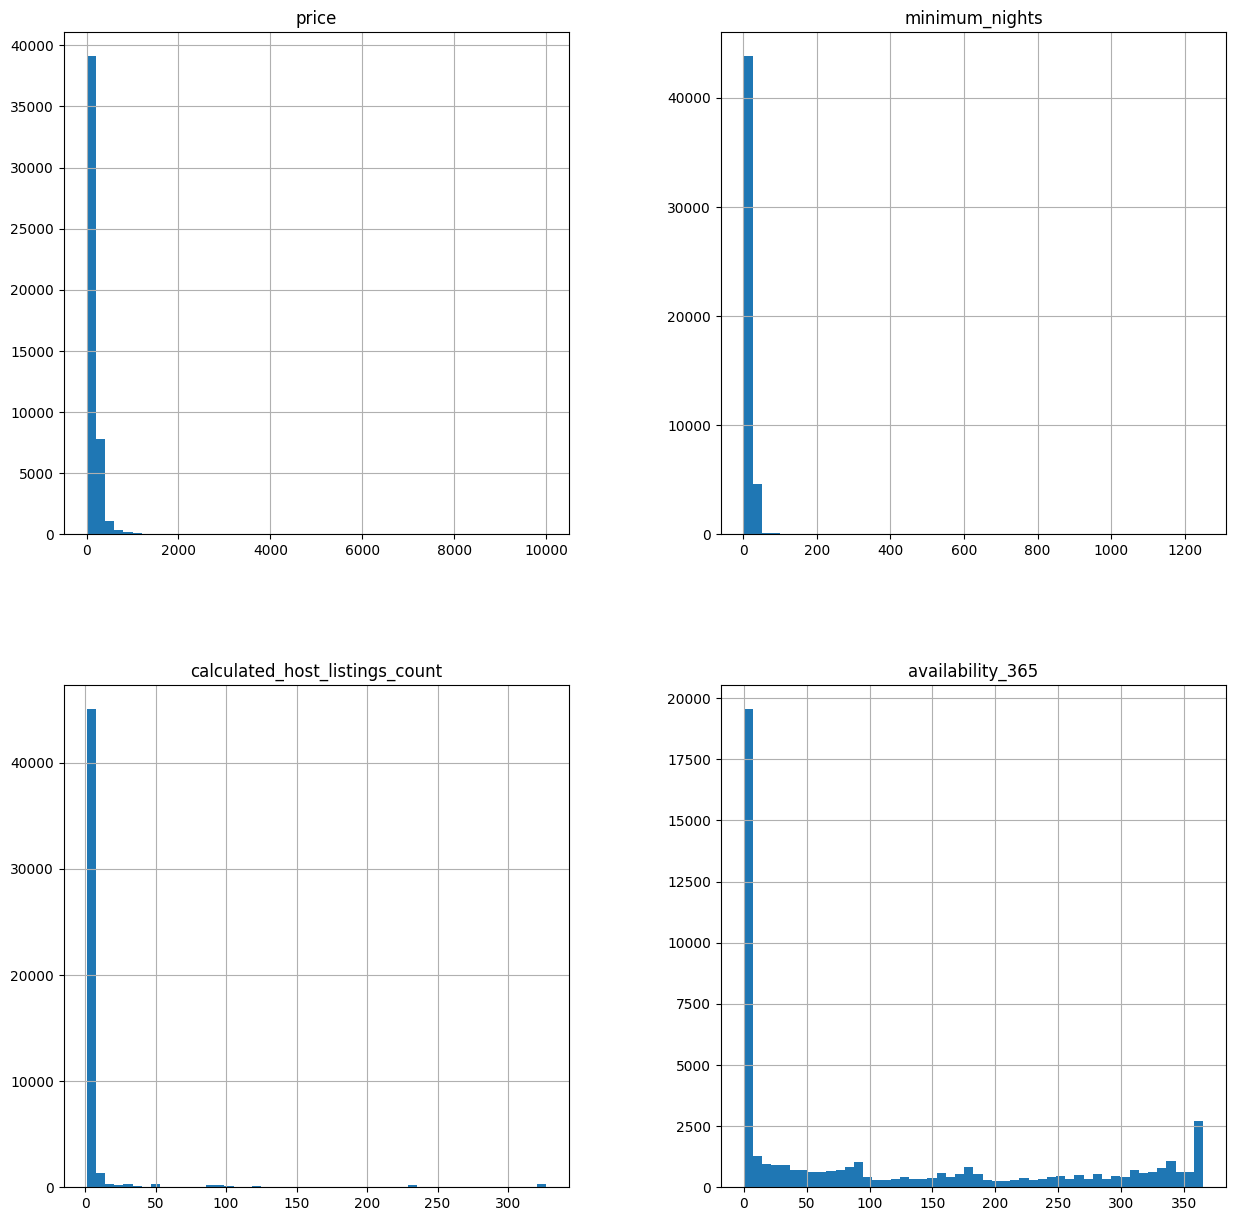

In [22]:
df_numericos = df[['price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']]
df_numericos.hist(bins=50, figsize=(15,15))

Para facilitar a visualização dos outliers, utilizaremos gráficos no formato BoxPlot

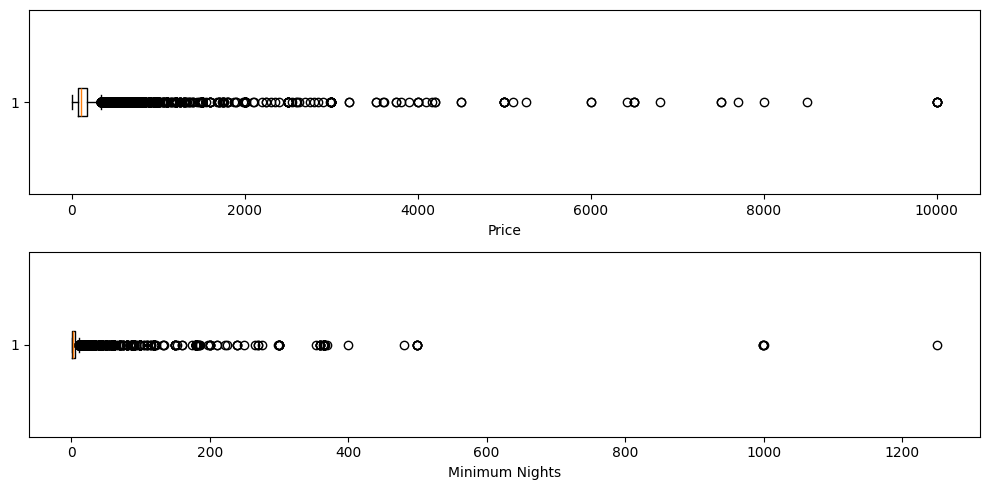

In [23]:
import matplotlib.pyplot as plt

# Criar uma figura com subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Adicionar o box plot de 'price' no primeiro subplot
axes[0].boxplot(df['price'], vert=False, showfliers=True)  # 'showfliers=True' para mostrar outliers
axes[0].set_xlabel('Price')

# Adicionar o box plot de 'minimum_nights' no segundo subplot
axes[1].boxplot(df['minimum_nights'], vert=False, showfliers=True)
axes[1].set_xlabel('Minimum Nights')

# Ajustar o layout para evitar sobreposição de títulos
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [ ]:
#Codigo para exportar img em png com Plotly.
fig_price = go.Figure()
fig_price.add_trace(go.Box(y=df['price'], name='Price', boxpoints='outliers'))  # Mostrar outliers
fig_price.update_layout(
    title="Box Plot para Price",
    yaxis=dict(
        title='Price',
        automargin=True
    )
)
fig_price.write_image("price_boxplot.png")

fig_min_nights = go.Figure()
fig_min_nights.add_trace(go.Box(y=df['minimum_nights'], name='Minimum Nights', boxpoints='outliers'))
fig_min_nights.update_layout(
    title="Box Plot para Minimum Nights",
    yaxis=dict(
        title='Minimum Nights',
        automargin=True
    )
)

fig_min_nights.write_image("minimum_nights_boxplot.png")

Após esta análise, observamos que é preciso limpar os outliers.
Começando com a variável minimum night, vamos considerar neste projeto apenas as estádias de crto prazo, ou seja, com o prazo de 30 ou menos noites.
Par conhecimento, veremos quantas entradas estão fora desse limite.



In [8]:
over30_nights = len(df[df['minimum_nights'] > 30])
over30_nights_percent = ((over30_nights) / df.shape[0]) * 100
print(f"Temos {over30_nights} registros acima de 30 noites.")
print(f"Isto corresponde a {over30_nights_percent:.2f}% dos dados")

Temos 747 registros acima de 30 noites.
Isto corresponde a 1.53% dos dados


Sabendo que temos poucos mais 1,5% dos dados acima de 30 noites, podemos considerar que limpar este outliers é benefíco para um resultado mais preciso do modelo.

In [9]:
df = df[(df['minimum_nights'] <= 30)].copy()

#Verificação após a exclusão
over30_nights = len(df[df['minimum_nights'] > 30])
print(f"Após a exclusão temos {over30_nights} registros acima de 30 noites.")

Após a exclusão temos 0 registros acima de 30 noites.


Voltamos um pouco para continuar a analise dos outliers, veremos como ficaram as variáveis Price e minimum_nights após a limpeza

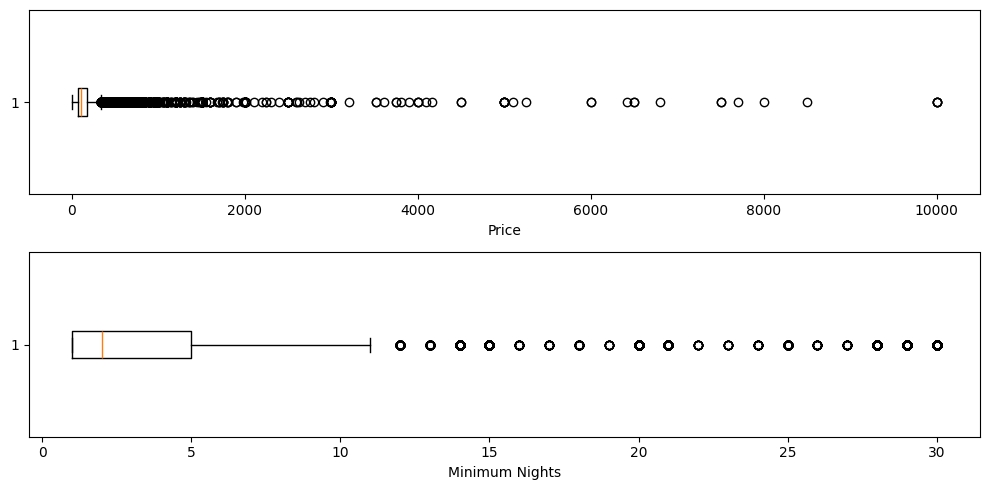

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

axes[0].boxplot(df['price'], vert=False, showfliers=True)
axes[0].set_xlabel('Price')

axes[1].boxplot(df['minimum_nights'], vert=False, showfliers=True)
axes[1].set_xlabel('Minimum Nights')

plt.tight_layout()

plt.show()

Anteriormente vimos que na variável price a média é aprox 150 e que o quartil 75% corresponde a 175. Sendo assim, ainda podemos ver que existem alguns dados que estão muito longe disso. Veremos quais.
Vimos também que na mesma variável, o valor minimo é 0. Como 0 não corresponde a um locação válida, iremos remove-la em seguida.

In [11]:
# Calcular o número total de propriedades
total_properties = len(df)

# Contar propriedades com preço maior que 175, 500, 1000 e 2000
above_175 = df[df['price'] > 175].shape[0]
above_500 = df[df['price'] > 500].shape[0]
above_1000 = df[df['price'] > 1000].shape[0]
above_2000 = df[df['price'] > 2000].shape[0]

# Calcular percentuais
percent_above_175 = (above_175 / total_properties) * 100
percent_above_500 = (above_500 / total_properties) * 100
percent_above_1000 = (above_1000 / total_properties) * 100
percent_above_2000 = (above_2000 / total_properties) * 100

# Imprimir os resultados
print(f"Propriedades com preço acima de $175: {above_175}")
print(f"Percentual de propriedades acima de $175: {percent_above_175:.2f}%")
print("\n")
print(f"Propriedades com preço acima de $500: {above_500}")
print(f"Percentual de propriedades acima de $500: {percent_above_500:.2f}%")
print("\n")
print(f"Propriedades com preço acima de $1000: {above_1000}")
print(f"Percentual de propriedades acima de $1000: {percent_above_1000:.2f}%")
print("\n")
print(f"Propriedades com preço acima de $2000: {above_2000}")
print(f"Percentual de propriedades acima de $2000: {percent_above_2000:.2f}%")

Propriedades com preço acima de $175: 11973
Percentual de propriedades acima de $175: 24.87%


Propriedades com preço acima de $500: 1012
Percentual de propriedades acima de $500: 2.10%


Propriedades com preço acima de $1000: 213
Percentual de propriedades acima de $1000: 0.44%


Propriedades com preço acima de $2000: 72
Percentual de propriedades acima de $2000: 0.15%


Temos 24% dos dados acima do 3* Quartil mas apenas 2% acima com valores acima de $500. Então, assim como fizemos em minimum_nights, pensando na qualidade do modelo, iremos remover da base os dados acima de $500 e também os valores igual a 0.

In [12]:
df = df[(df['price'] <= 500) & (df['price'] > 0)].copy()

# Verificação dos dados após esta limpeza
df[['price']].describe()

,price
count,47124.000000
mean,131.499448
std,88.049556
min,10.000000
25%,68.000000
50%,100.000000
75%,172.000000
max,500.000000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

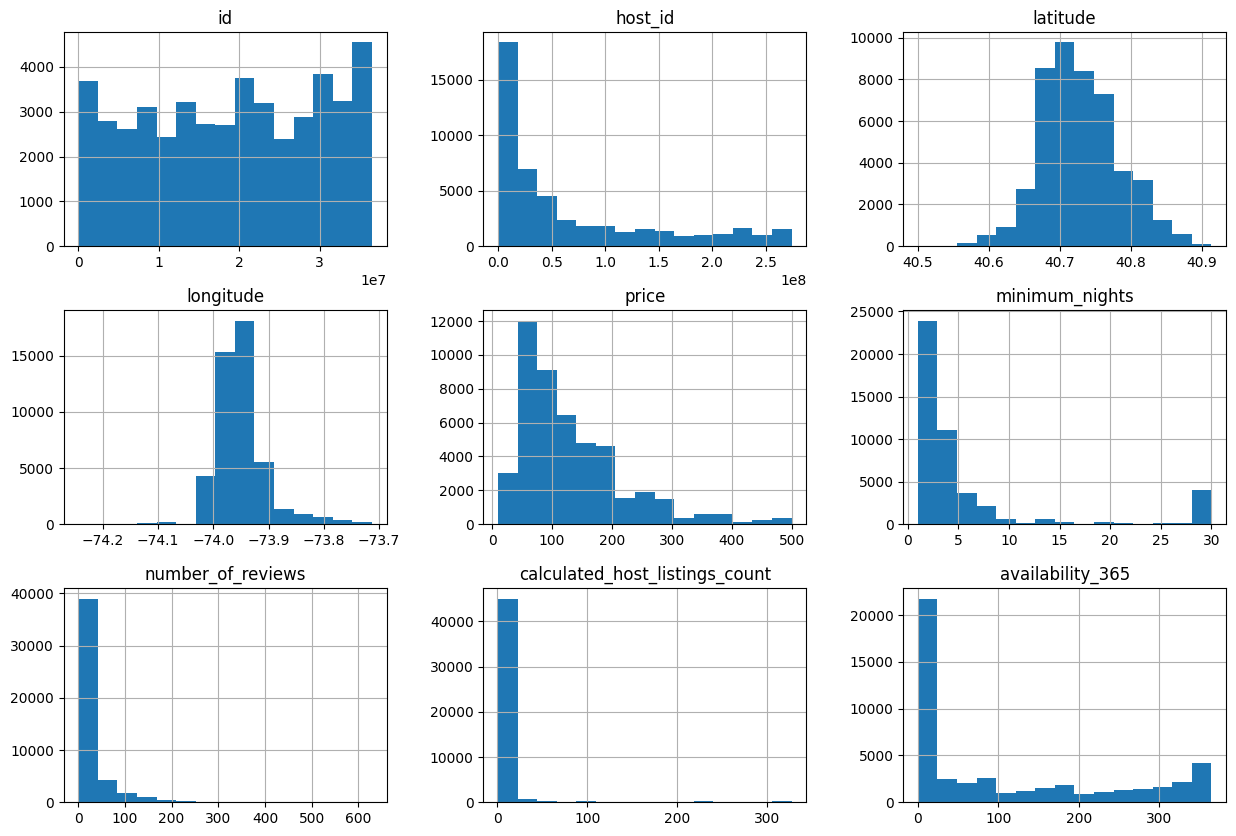

In [29]:
# Revendo os histogramas após o tratamento dos dados
df.hist(bins=15, figsize=(15,10))

Agora vemos que a distribuição melhorou, mas os valores em price e minimum_nights ainda estão mais próximos do 0.

Antes de seguir com outras analises, iremos ver a matriz de correlação entre as variáveis númericas.

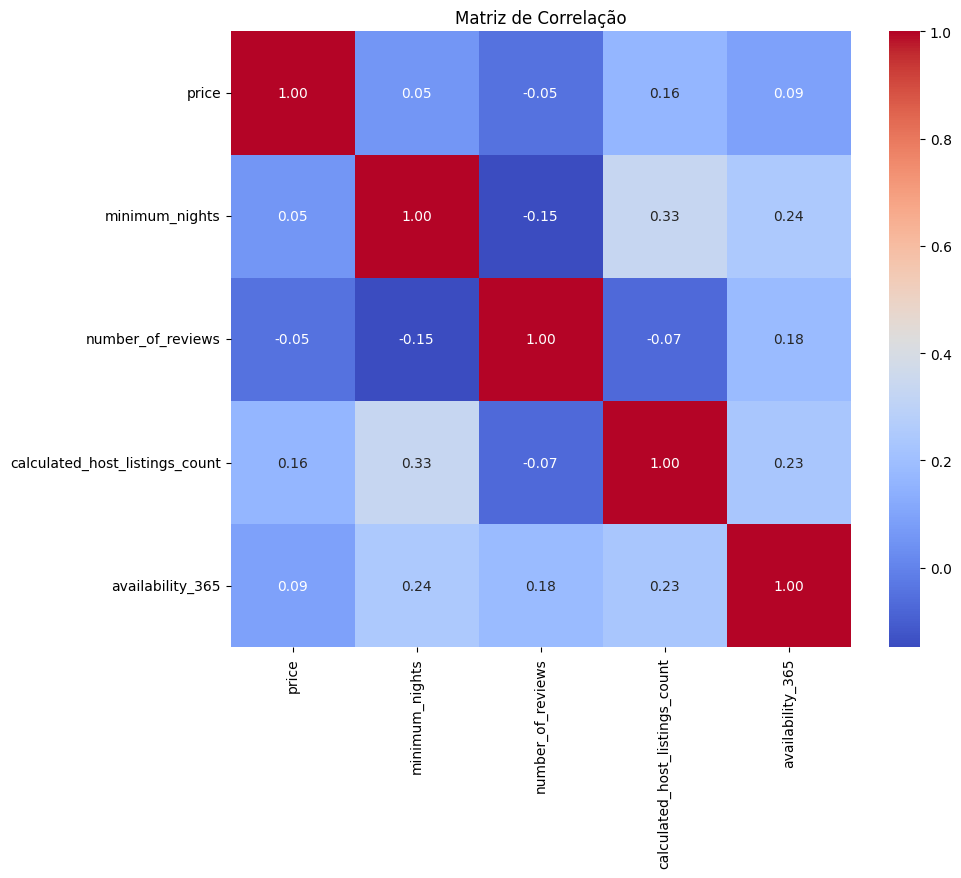

In [30]:
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação')
plt.show()

Não existe nenhuma correlação significativa. 
Sendo assim, continuamos as análises dos dados com as variáveis room_types, neighbourhood_group e neighbourhood para entender seu comportamento no dataframe.


In [ ]:
#Codigo para exportar img em png com Plotly.

corr = df[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()

fig = px.imshow(corr, text_auto=True, aspect="auto",
                labels=dict(x="Variable", y="Variable", color="Correlation"),
                x=corr.columns, y=corr.columns,
                color_continuous_scale='RdBu', color_continuous_midpoint=0)

fig.update_layout(title='Matriz de Correlação',
                  margin=dict(l=10, r=10, t=50, b=10))

fig.write_image("../docs/graphics/correlation_matrix.png")


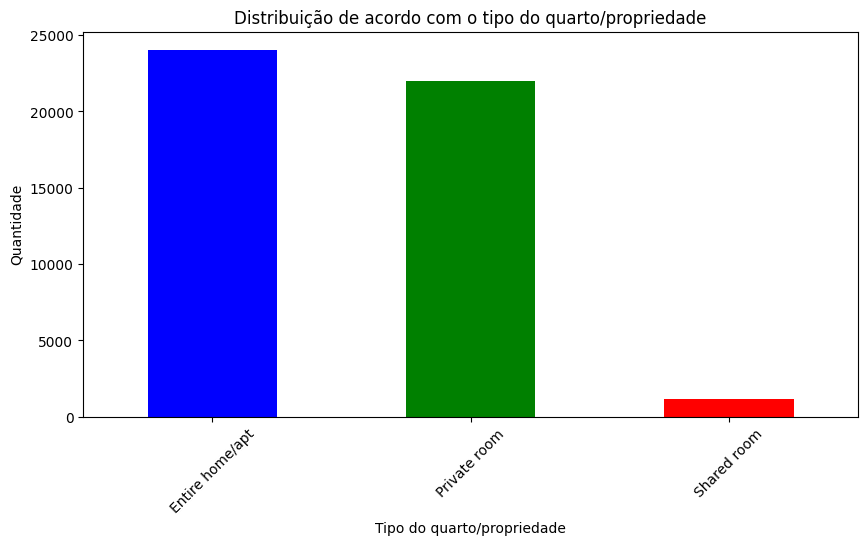

In [31]:
# Agrupar os dados e contar as ocorrências de cada tipo de quarto e depois gerar um gráfico para exibir o resultado.
room_counts = df['room_type'].value_counts()

plt.figure(figsize=(10, 5))
room_counts.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title('Distribuição de acordo com o tipo do quarto/propriedade')
plt.xlabel('Tipo do quarto/propriedade')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)  
plt.show()

Abaixo agrupamos a contagem dos dados da variável "neighbourhood_group" e em seguida exibimos essa informação em um gráfico de rosca que demonstra a proporção de listagens por grupo de bairros.
Antes de exibir o resultado é feito um ajuste no título e legenda.

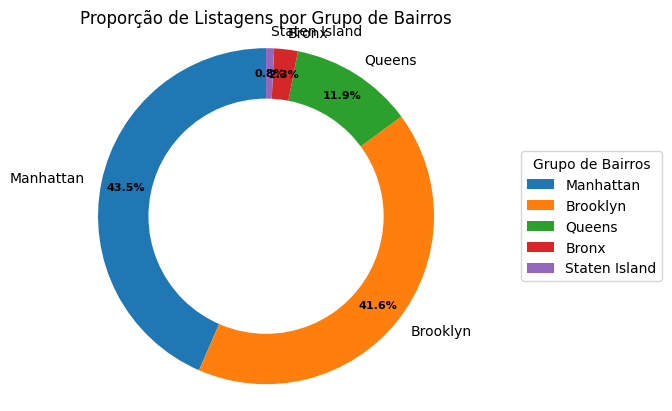

In [32]:
group_counts = df['neighbourhood_group'].value_counts()

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4))

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.setp(autotexts, size=8, weight="bold", color="black")

ax.set_title('Proporção de Listagens por Grupo de Bairros')
ax.legend(title="Grupo de Bairros", loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')

plt.show()

In [ ]:
#Codigo para exportar img em png com Plotly.

fig = px.pie(df, names='neighbourhood_group', title="Proporção de Listagens por Grupo de Bairros",
             hole=0.4,  # Cria o efeito de rosca
             labels={'neighbourhood_group':'Grupo de Bairros'})

# Adicionar legendas com porcentagens
fig.update_traces(textinfo='label+percent')

fig.update_layout(legend=dict(
    title="Grupo de Bairros",
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.write_image("../docs/graphics/neighbourhood_group_pie_chart.png")

Abaixo iremos agrupar os dados por 'neighbourhood_group' em seguida calcular algumas médias, ordenar os resultados pelo preço médio e disponibilidade. Por último exibiremos o resultado.

In [33]:
aggregated_data = df.groupby('neighbourhood_group').agg({
    'price': 'mean',
    'availability_365': 'mean',
    'number_of_reviews': 'mean',
    'minimum_nights': 'mean'
}).reset_index()

sorted_data = aggregated_data.sort_values(by=['price', 'availability_365'], ascending=[False, True])

print(sorted_data)

  neighbourhood_group       price  availability_365  number_of_reviews  \
2           Manhattan  163.298037        107.474712          21.577133   
1            Brooklyn  112.696259         98.791102          24.487055   
3              Queens   93.026321        143.772247          27.956670   
4       Staten Island   91.432507        198.360882          31.787879   
0               Bronx   81.976636        165.566355          26.412150   

   minimum_nights  
2        6.712654  
1        4.878453  
3        4.355953  
4        3.603306  
0        3.242056  


A proxima etapa, será analisar a Média de Preço e Disponibilidade por Região (Neighbourhood Group). Para isso primeiro achamos as medias das variáveis price, availability_365 e minimum_nights. Em seguida o codigo irá ordenar as mesmas para em seguida mostrar o resultado um gráfico.

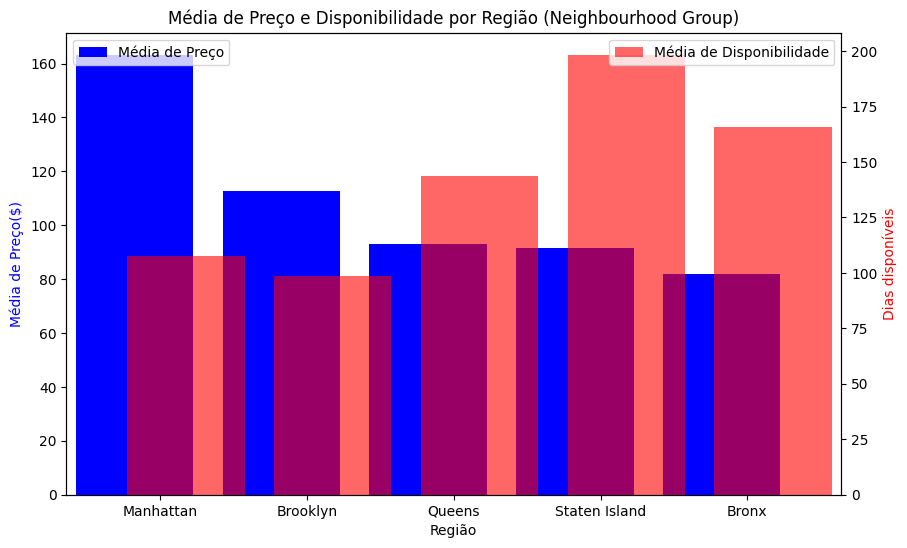

In [34]:
# Agrupar dados por 'neighbourhood_group' e calcular métricas importantes
aggregated_data = df.groupby('neighbourhood_group').agg({
    'price': 'mean',
    'availability_365': 'mean',
    'minimum_nights': 'mean'
}).reset_index()

# 
sorted_data = aggregated_data.sort_values(by=['price', 'availability_365'], ascending=[False, True])

fig, ax1 = plt.subplots(figsize=(10, 6))

price_bars = ax1.bar(sorted_data['neighbourhood_group'], sorted_data['price'], color='b', label='Média de Preço')

ax2 = ax1.twinx()
availability_bars = ax2.bar(sorted_data['neighbourhood_group'], sorted_data['availability_365'], color='r', alpha=0.6, label='Média de Disponibilidade')

ax1.set_title('Média de Preço e Disponibilidade por Região (Neighbourhood Group)')
ax1.set_xlabel('Região')
ax1.set_ylabel('Média de Preço($)', color='b')
ax2.set_ylabel('Dias disponíveis', color='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

bar_width = 0.35
for bar in price_bars:
    bar.set_x(bar.get_x() - bar_width/2)

for bar in availability_bars:
    bar.set_x(bar.get_x() + bar_width/2)

plt.show()

In [46]:
#Codigo para exportar img em png com Plotly.

# Agrupar dados por 'neighbourhood_group' e calcular métricas importantes
aggregated_data = df.groupby('neighbourhood_group').agg({
    'price': 'mean',
    'availability_365': 'mean',
    'minimum_nights': 'mean'
}).reset_index()

# Ordenar dados
sorted_data = aggregated_data.sort_values(by=['price', 'availability_365'], ascending=[False, True])

# Criar figura Plotly
fig = go.Figure()

# Adicionar barras de preço com valores nos rótulos
fig.add_trace(go.Bar(
    x=sorted_data['neighbourhood_group'],
    y=sorted_data['price'],
    name='Média de Preço',
    marker_color='blue',
    offsetgroup=0,
    text=sorted_data['price'].round(2),  # Arredondando os valores e convertendo para texto
    textposition='outside'  # Posiciona o texto fora das barras para melhor visibilidade
))

# Adicionar barras de disponibilidade com valores nos rótulos
fig.add_trace(go.Bar(
    x=sorted_data['neighbourhood_group'],
    y=sorted_data['availability_365'],
    name='Média de Disponibilidade',
    marker_color='red',
    opacity=0.6,
    offsetgroup=1,
    text=sorted_data['availability_365'].round(2),  # Arredondando os valores e convertendo para texto
    textposition='outside'  # Posiciona o texto fora das barras para melhor visibilidade
))

# Atualizar layout do gráfico
fig.update_layout(
    title_text='Média de Preço e Disponibilidade por Região (Neighbourhood Group)',
    xaxis_title="Região",
    yaxis=dict(
        title='Média de Preço($)',
        tickfont=dict(size=14),
    ),
    yaxis2=dict(
        title='Dias Disponíveis',
        tickfont=dict(size=14),
        overlaying='y',
        side='right'
    ),
    legend=dict(
        x=0.01,
        y=0.99,
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor='rgba(0, 0, 0, 0.1)'
    ),
    barmode='group',
    bargap=0.15,  # espaço entre barras de diferentes localizações x
    bargroupgap=0.1  # espaço entre barras do mesmo localização x
)

# Exportar o gráfico como uma imagem PNG
fig.write_image('../docs/graphics/map_nyc_neighbourhood_analysis.png')


Imaginando um conceito de escassez, o gráfico acima mostra que as duas regiões onde as propriedades apresentam uma menor disponibilidade, possuem uma média de preço superior as demais regiões.


Será que essa média de preço superior se confirma comparando os tipos de quartos?

Ok, sabemos que os imóveis inteiros possuem uma receita maior pensando no conjunto total de dados, mas como isso se comporta de forma diária?


Para isso vamor criar um gráfico onde pegaremos o preço diário (multiplicamos o preço pelo resultado da divisão da disponibilidade por 365 (entendemos que os dados sejam anuais).

Depois faremos um grupo com os tipos de quartos e a média desses preços.

Por último exibimos o gráfico.

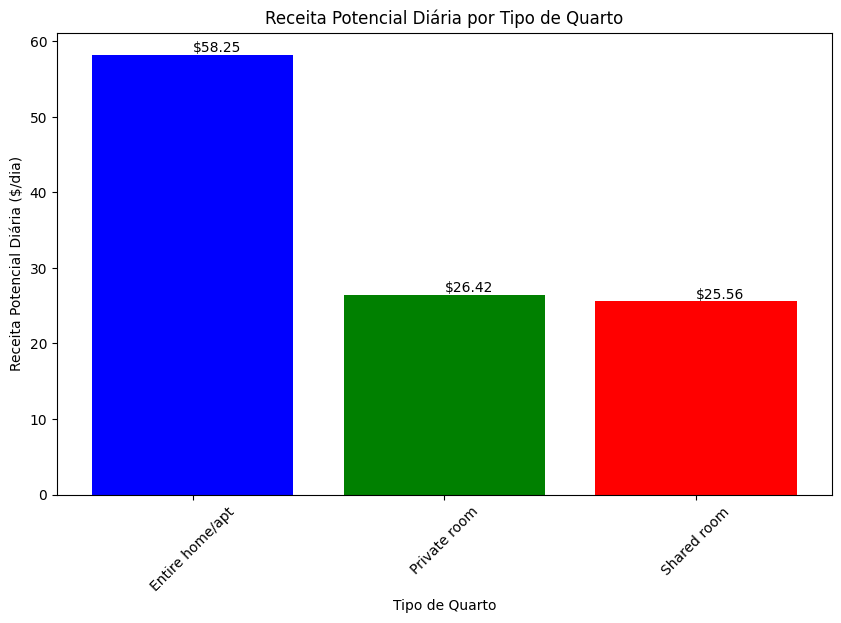

In [35]:
df['daily_revenue_potential'] = df['price'] * (df['availability_365'] / 365)

revenue_by_room_type = df.groupby('room_type')['daily_revenue_potential'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(revenue_by_room_type.index, revenue_by_room_type.values, color=['blue', 'green', 'red', 'purple'])

plt.title('Receita Potencial Diária por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Receita Potencial Diária ($/dia)')
plt.xticks(rotation=45) 

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${round(yval, 2)}', va='bottom')  # va: vertical alignment

plt.show()

In [43]:
#Codigo para exportar img em png com Plotly.

df['daily_revenue_potential'] = df['price'] * (df['availability_365'] / 365)

# Agrupando por tipo de quarto e calculando a média de receita potencial diária
revenue_by_room_type = df.groupby('room_type')['daily_revenue_potential'].mean().sort_values(ascending=False)

# Criando o gráfico de barras com Plotly
fig = go.Figure(data=[
    go.Bar(
        x=revenue_by_room_type.index,
        y=revenue_by_room_type.values,
        text=[f'${round(v, 2)}' for v in revenue_by_room_type.values],
        textposition='outside',  # Posicionando o texto fora das barras
        marker_color=['blue', 'green', 'red', 'purple']  # Cores das barras
    )
])

# Atualizando o layout do gráfico
fig.update_layout(
    title='Receita Potencial Diária por Tipo de Quarto',
    xaxis_title='Tipo de Quarto',
    yaxis_title='Receita Potencial Diária ($/dia)',
    autosize=False,
    width=1000,
    height=600
)

# Exportar o gráfico como PNG e visualizar
fig.write_image("../docs/graphics/daily_revenue_by_room_type_plotly.png")

No gráfico podemos ver que a média de preço no Imóvel Inteiro é superior ao dobro dos demais.


Agora precisamos saber em qual bairro a média de preço é mais alta.

Para isso faremos o mesmo processo acima, trocando apenas o tipo de quarto pela região.

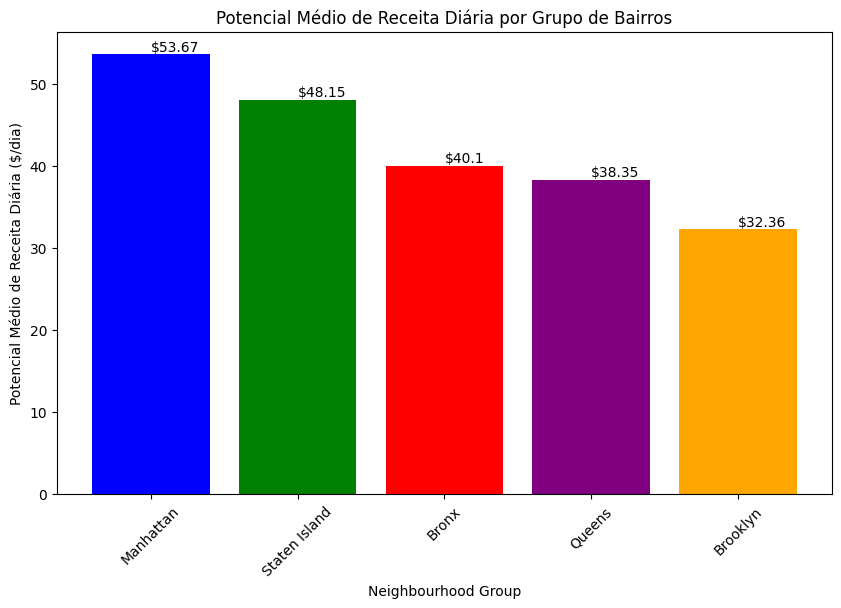

In [44]:
revenue_by_neighbourhood = df.groupby('neighbourhood_group')['daily_revenue_potential'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(revenue_by_neighbourhood.index, revenue_by_neighbourhood.values, color=['blue', 'green', 'red', 'purple', 'orange'])

plt.title('Potencial Médio de Receita Diária por Grupo de Bairros')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Potencial Médio de Receita Diária ($/dia)')
plt.xticks(rotation=45)  

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${round(yval, 2)}', va='bottom')  

plt.show()

In [ ]:
#Codigo para exportar img em png com Plotly.

# Agrupar dados por 'neighbourhood_group' e calcular a média do 'daily_revenue_potential'
revenue_by_neighbourhood = df.groupby('neighbourhood_group')['daily_revenue_potential'].mean().sort_values(ascending=False)

# Criar figura Plotly
fig = go.Figure()

# Adicionar barras ao gráfico
fig.add_trace(go.Bar(
    x=revenue_by_neighbourhood.index,
    y=revenue_by_neighbourhood.values,
    text=[f'${round(v, 2)}' for v in revenue_by_neighbourhood.values],  # Adiciona os valores formatados como texto nas barras
    textposition='outside',  # Posiciona o texto fora das barras
    marker_color=['blue', 'green', 'red', 'purple', 'orange']  # Cores das barras
))

# Atualizar o layout do gráfico
fig.update_layout(
    title='Potencial Médio de Receita Diária por Grupo de Bairros',
    xaxis_title='Neighbourhood Group',
    yaxis_title='Potencial Médio de Receita Diária ($/dia)',
    xaxis=dict(tickangle=45),  # Rotação dos labels no eixo x
    autosize=False,  # Desativa o autosize para definir manualmente o tamanho
    width=1000,  # Largura da figura
    height=600  # Altura da figura
)

# Exportar o gráfico como uma imagem PNG
fig.write_image("../docs/graphics/neighbourhood_daily_revenue.png")


Sabendo que Manhattan tem o melhor Potencial de Receita Diária, veremos qual o melhor tipo de propriedade.

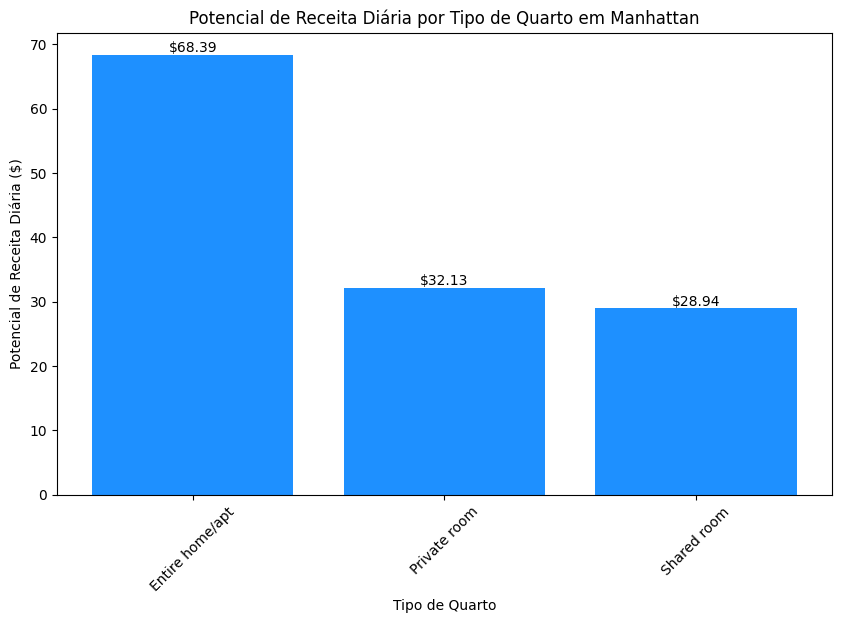

In [47]:
# Filtrar para incluir apenas propriedades em Manhattan
manhattan_data = df[df['neighbourhood_group'] == 'Manhattan']

# Calcular a receita potencial diária para Manhattan
manhattan_data['daily_revenue_potential'] = manhattan_data['price'] * (manhattan_data['availability_365'] / 365)

# Agrupar dados por 'room_type' e calcular a média da receita potencial diária
revenue_by_room_type_in_manhattan = manhattan_data.groupby('room_type')['daily_revenue_potential'].mean().sort_values(ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(revenue_by_room_type_in_manhattan.index, revenue_by_room_type_in_manhattan.values, color='dodgerblue')
plt.title('Potencial de Receita Diária por Tipo de Quarto em Manhattan')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Potencial de Receita Diária ($)')
plt.xticks(rotation=45)

# Adicionar rótulos de texto em cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:.2f}', ha='center', va='bottom')

plt.show()

In [48]:
#Codigo para exportar img em png com Plotly

# Filtrar para incluir apenas propriedades em Manhattan
manhattan_data = df[df['neighbourhood_group'] == 'Manhattan']

# Calcular a receita potencial diária para Manhattan
manhattan_data['daily_revenue_potential'] = manhattan_data['price'] * (manhattan_data['availability_365'] / 365)

# Agrupar dados por 'room_type' e calcular a média da receita potencial diária
revenue_by_room_type_in_manhattan = manhattan_data.groupby('room_type')['daily_revenue_potential'].mean().sort_values(ascending=False)

# Criar figura Plotly
fig = go.Figure()

# Adicionar barras ao gráfico
fig.add_trace(go.Bar(
    x=revenue_by_room_type_in_manhattan.index,
    y=revenue_by_room_type_in_manhattan.values,
    text=[f'${v:.2f}' for v in revenue_by_room_type_in_manhattan.values],  # Adiciona os valores formatados como texto nas barras
    textposition='outside',  # Posiciona o texto fora das barras
    marker_color='dodgerblue'  # Cor das barras
))

# Atualizar o layout do gráfico
fig.update_layout(
    title='Potencial de Receita Diária por Tipo de Quarto em Manhattan',
    xaxis_title='Tipo de Quarto',
    yaxis_title='Potencial de Receita Diária ($)',
    xaxis=dict(tickangle=45),  # Rotação dos labels no eixo x
    autosize=False,  # Desativa o autosize para definir manualmente o tamanho
    width=1000,  # Largura da figura
    height=600  # Altura da figura
)

# Exportar o gráfico como uma imagem PNG
fig.write_image('../docs/graphics/manhattan_daily_revenue_by_room_type.png')


No gráfico acima, confirmamos o que vimos acima: o imóvel inteiro apresenta mais que o dobro da média de preço.


# Então todos os imóveis inteiros são mais rentáveis do que alugar um quarto privativo ou compartilhado?

Vamos descobrir a Média de Preço por Tipo de Quarto e Região (Neighbourhood Group).
Para isso começamos agrupando os dados das regiões e tipos de quartos em relação e sua respectiva média de preços. Depois usamos a função unstack() para melhorar a disposição e visualização dos dados.

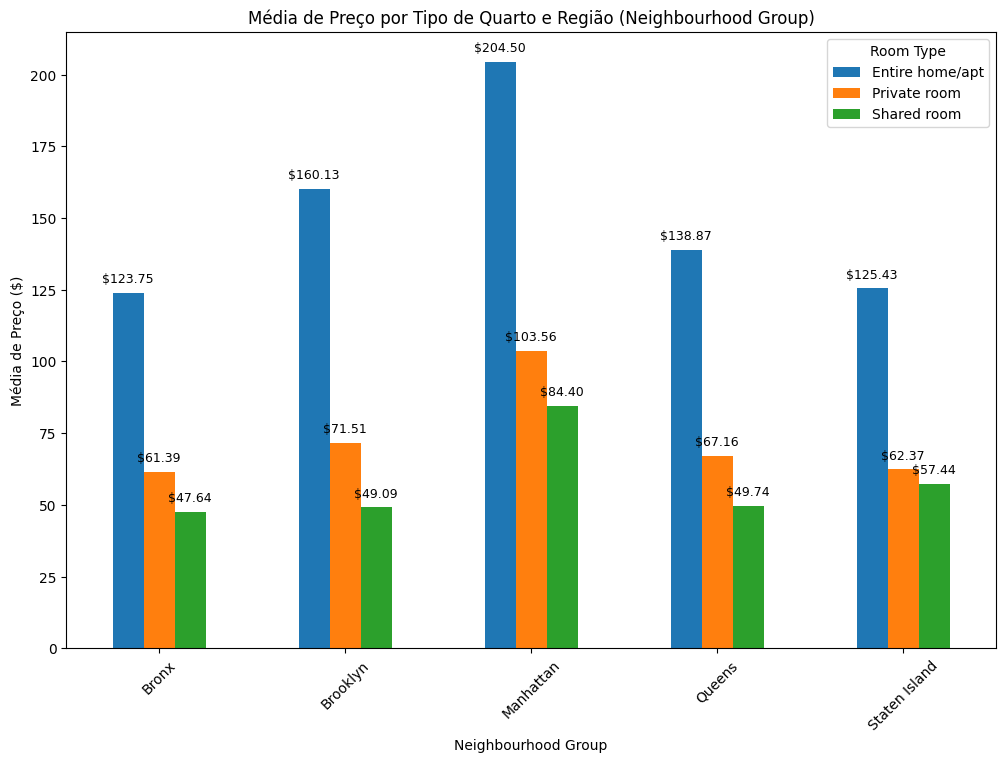

In [49]:
price_by_room_and_neighbourhood = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()

fig, ax = plt.subplots(figsize=(12, 8))
bars = price_by_room_and_neighbourhood.plot(kind='bar', ax=ax)

ax.set_title('Média de Preço por Tipo de Quarto e Região (Neighbourhood Group)')
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Média de Preço ($)')
plt.xticks(rotation=45)
ax.legend(title='Room Type')

for p in ax.patches:
    ax.annotate(f'${p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', rotation=0, xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [ ]:
#Codigo para exportar img em png com Plotly

# Agrupar dados por 'neighbourhood_group' e 'room_type' e calcular a média do preço
price_by_room_and_neighbourhood = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()

# Criar figura Plotly
fig = go.Figure()

# Adicionar barras ao gráfico para cada tipo de quarto
for room_type in price_by_room_and_neighbourhood.columns:
    fig.add_trace(go.Bar(
        x=price_by_room_and_neighbourhood.index,
        y=price_by_room_and_neighbourhood[room_type],
        name=room_type,
        text=[f"${v:.2f}" for v in price_by_room_and_neighbourhood[room_type]],  # Adiciona os valores formatados como texto nas barras
        textposition='outside'  # Posiciona o texto fora das barras
    ))

# Atualizar layout do gráfico
fig.update_layout(
    title='Média de Preço por Tipo de Quarto e Região (Neighbourhood Group)',
    xaxis_title='Região',
    yaxis_title='Média de Preço ($)',
    legend_title='Tipo de Quarto',
    barmode='group',
    width=1500, 
    height=1000  
)

fig.write_image("../docs/graphics/average_price_by_room_and_neighbourhood.png", scale=1)  # scale=1 mantém a resolução conforme definido em width e height

Analisando o gráfico acima, podemos afirmar que o so vale alugar o imóvel inteiro, caso vc tenha 1 ou dois quartos, pois os valores ficam muito próximos. Agora, caso tenha 3 ou mais, vale a pena alugar eles individualmente, como quarto privativo, pois o proprietário teria um acréscimo na receita considerando o mesmo período.

# Tira teima

Abaixo vou fazer uma analise pra saber, aleatoriamente, se os valores acima correspondem com um imovel de cada região, sendo que esta propriedade precisar ter a mesma quantidade de dias disponíveis.

Para isso, primeiro devemos saber qual a mediana da variável availability_365 

In [60]:
median_availability = df['availability_365'].median()
print(f"A mediana da variável availability_365 é: {int(median_availability)}")


A mediana da variável availability_365 é: 41


Sabendo disso, vamos ver se temos o mesmo registro em todas as regiões:

In [61]:
is_41_in_every_group = df.groupby('neighbourhood_group')['availability_365'].apply(lambda x: 41 in x.values).all()

if is_41_in_every_group:
    print("O valor 41 está presente na variável 'availability_365' em todos os 'neighbourhood_group'.")
else:
    print("O valor 41 não está presente na variável 'availability_365' em todos os 'neighbourhood_group'.")


O valor 41 não está presente na variável 'availability_365' em todos os 'neighbourhood_group'.


Como o número 41 consta em todos as regiões dentro da variável , vou testar com um numero próximo, no caso 40.

In [62]:
is_40_in_every_group = df.groupby('neighbourhood_group')['availability_365'].apply(lambda x: 40 in x.values).all()

if is_40_in_every_group:
    print("O valor 40 está presente na variável 'availability_365' em todos os 'neighbourhood_group'.")
else:
    print("O valor 40 não está presente na variável 'availability_365' em todos os 'neighbourhood_group'.")


O valor 40 está presente na variável 'availability_365' em todos os 'neighbourhood_group'.


Como o número 40 esta presente em todas as regiões, vamos agrupar  1 registro de cada, de forma aleatória, respeitando o mesmo tipo de propriedade (para este exemplo usaremos o Entire home/apt (imóvel inteiro)) para comparar com o Potencial de Receita Diária.

In [63]:
# Filtrar os dados para incluir apenas entradas onde 'availability_365' é igual a 40 e o tipo de quarto é "Entire home/apt"
filtered_data = df[(df['availability_365'] == 40) & (df['room_type'] == "Entire home/apt")]

# Função para selecionar aleatoriamente uma entrada de cada grupo
def random_sample(group):
    return group.sample(1)

# Agrupar por 'neighbourhood_group' e aplicar a função para selecionar aleatoriamente
random_selection = filtered_data.groupby('neighbourhood_group').apply(random_sample).reset_index(drop=True)

# Calcular o potencial de receita diária para cada propriedade selecionada (preço * 40 dias / 365 dias)
random_selection['daily_revenue_potential'] = (random_selection['price'] * 40) / 365

# Exibir as entradas selecionadas
print(random_selection)

         id                                          name    host_id  \
0  36442252                 1B-1B Apartment Near By Metro  273841667   
1   1941495         Huge Garden Duplex, 20 Min Manhattan!    1430695   
2  35947579  Urban Oasis W/3Br In The Middle Of Manhattan  128898379   
3  13004996                              Beach Bungalow 2   71717596   
4  15833574                  Delightful Studio Apartment.  102526590   

                        host_name neighbourhood_group      neighbourhood  \
0                          Blaine               Bronx         Mott Haven   
1  Julia, Anthony, Apollo & Atlas            Brooklyn           Bushwick   
2                           Davis           Manhattan            Midtown   
3                            Beth              Queens     Rockaway Beach   
4                          Edward       Staten Island  Castleton Corners   

   latitude  longitude        room_type  price  minimum_nights  \
0  40.80787  -73.92400  Entire home/apt    1

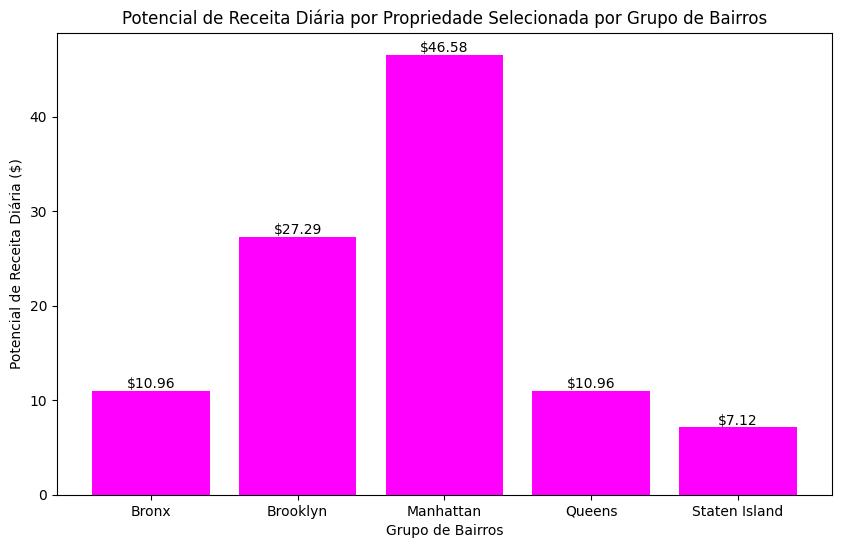

In [64]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(random_selection['neighbourhood_group'], random_selection['daily_revenue_potential'], color='magenta')

# Adicionar títulos e rótulos
plt.title('Potencial de Receita Diária por Propriedade Selecionada por Grupo de Bairros')
plt.xlabel('Grupo de Bairros')
plt.ylabel('Potencial de Receita Diária ($)')

# Adicionar rótulos de texto em cada barra para mostrar o potencial de receita diária
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${yval:.2f}', va='bottom', ha='center')

# Mostrar o gráfico
plt.show()

In [65]:
#Codigo para exportar img em png com Plotly

fig = go.Figure()

# Adicionar barras ao gráfico
fig.add_trace(go.Bar(
    x=random_selection['neighbourhood_group'],
    y=random_selection['daily_revenue_potential'],
    text=[f"${v:.2f}" for v in random_selection['daily_revenue_potential']],  # Adiciona os valores formatados como texto nas barras
    textposition='outside'  # Posiciona o texto fora das barras
))

# Atualizar o layout do gráfico
fig.update_layout(
    title='Potencial de Receita Diária por Propriedade Selecionada por Grupo de Bairros',
    xaxis_title='Grupo de Bairros',
    yaxis_title='Potencial de Receita Diária ($)',
    autosize=False,  # Desativa o autosize para definir manualmente o tamanho
    width=1000,
    height=600 
)

# Exportar o gráfico como uma imagem PNG
fig.write_image('../docs/graphics/daily_revenue_potential_by_neighbourhood.png', scale=1)

# Mapas

A seguir vamos gerar algumas imagens para o EDA. Estas imagens serão geradas com o Plotly e devido a uma incompatibilidade da versão que estou usado do Plotly com minha IDE, estes gráficos estarão presentes apenas no arquivo Rental_Price_NY_EDA.pdf, disponível dentro da pasta Files.

Nesta análise iremos separar os valores na variável price em quartis. 

In [66]:
df_map = df.copy()
df_map['price_quartile'] = pd.qcut(df_map['price'], 4, labels=['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile'])

Neste primeiro gráfico separamos os preços em quartis para entender se os pontos turísticos escolhidos tem alguma correlação. 

In [ ]:
#Codigo para exportar o mapa de NY em png e html com Plotly

# Dicionário para mapear quartis com cores
quartile_colors = {
    '1st Quartile': 'blue',
    '2nd Quartile': 'green',
    '3rd Quartile': 'yellow',
    '4th Quartile': 'red'
}

# Criando a figura com Plotly Graph Objects
fig = go.Figure()

# Loop para adicionar cada quartil como um conjunto de dados separado
for quartile, color in quartile_colors.items():
    # Filtra os dados por quartil
    quartile_data = df_map[df_map['price_quartile'] == quartile]
    fig.add_trace(go.Scattermapbox(
        lat=quartile_data['latitude'],
        lon=quartile_data['longitude'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=5,
            color=color,  # Cor associada ao quartil
        ),
        name=quartile  # Nome do quartil para a legenda
    ))

# Atualizar layout para incluir configurações do mapa e legenda
fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        bearing=0,
        center=dict(
            lat=40.7128,
            lon=-74.0060
        ),
        pitch=0,
        zoom=9,
        style='open-street-map'  # Usando um estilo básico que não requer token
    ),
    margin={"r":30, "t":100, "l":0, "b":0}
)

# Exportar o gráfico como uma imagem PNG
fig.write_image("../docs/graphics/map_nyc_ok.png")
fig.write_html("../docs/graphics/map_nyc_ok.html")


O gráfico abaixo exibe o mesmo mapa, porém com alguns dados novos: os pontos turísticos escolhidos.

In [ ]:
#Codigo para exportar o mapa de NY com alguns pontos turísticos em png e html com Plotly

fig = go.Figure(go.Scattermap(
#fig.add_trace(go.Scattermapbox(
    # Listas para armazenar latitudes e longitudes
        lat=[40.780184, 40.6892534, 40.748441, 40.707417, 40.758896, 
             40.752394, 40.7060113, 40.712742],

        lon=[-73.969145, -74.0466891, -73.985664, -74.010837, -73.985130, 
             -73.977599, -73.9988595, -74.013382],

        mode='markers',
        marker=go.scattermap.Marker(
        #marker=go.scattermapbox.Marker(
            size=10,
        ),
        # Lista para armazenar os nomes dos locais
        text=["Central Park", "Statue of Liberty National Monument", "Empire State Building",
             "Wall Street", "Times Square", "Grand Central Terminal", "Brooklyn Bridge",
             "One World Trade Center"],
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    map=dict(
    #mapbox=dict(
        bearing=0,
        center=dict(
            lat=40.7128,
            lon=-74.0060
        ),
        pitch=0,
        zoom=9,
        #style='open-street-map'  # Usando um estilo básico que não requer token
    ),
    margin={"r":30, "t":100, "l":0, "b":0}
)

fig.write_image("../docs/graphics/map_nyc_pontos_turisticos.png")
fig.write_html("../docs/graphics/map_nyc_pontos_turisticos.html")

Outro ponto que podemos pesquisar, é alguma semelhança entre o título (name) e o preço.
Através do mapa, já conseguimos perceber que os imóveis que estão no 4° Quartil ficam próximos ao Central Park. Será que os usuários colocam isto para chamar a atenção?

In [75]:
# Filtrar as propriedades que estão no 4º quartil
quartile_4_data = df_map[df_map['price_quartile'] == '4th Quartile']

# Verificar a ocorrência de "Central Park" na coluna 'name'
contains_central_park = quartile_4_data['name'].str.contains('Central Park', case=False, na=False)

# Contar quantas vezes a frase "Central Park" aparece
central_park_count = contains_central_park.sum()

# Calcular o total de propriedades no 4º quartil
total_properties_in_quartile = quartile_4_data.shape[0]

# Calcular o percentual de propriedades que mencionam "Central Park"
percent_central_park = (central_park_count / total_properties_in_quartile) * 100

# Exibir os resultados
print(f"A frase 'Central Park' aparece {central_park_count} vezes nos nomes das propriedades no 4º quartil de preço.")
print(f"Isto corresponde a {percent_central_park:.2f}% das propriedades no 4º quartil.")

A frase 'Central Park' aparece 460 vezes nos nomes das propriedades no 4º quartil de preço.
Isto corresponde a 3.91% das propriedades no 4º quartil.


In [76]:
# Filtrar as propriedades que estão nos quartis 1, 2 e 3
quartile_1_2_3_data = df_map[df_map['price_quartile'].isin(['1st Quartile', '2nd Quartile', '3rd Quartile'])]

# Verificar a ocorrência de "Central Park" na coluna 'name'
contains_central_park = quartile_1_2_3_data['name'].str.contains('Central Park', case=False, na=False)

# Contar quantas vezes a frase "Central Park" aparece
central_park_count = contains_central_park.sum()

# Calcular o total de propriedades nos quartis 1, 2 e 3
total_properties_in_quartiles = quartile_1_2_3_data.shape[0]

# Calcular o percentual de propriedades que mencionam "Central Park"
percent_central_park = (central_park_count / total_properties_in_quartiles) * 100

# Exibir os resultados
print(f"A frase 'Central Park' aparece {central_park_count} vezes nos nomes das propriedades nos quartis 1, 2 e 3 de preço.")
print(f"Isto corresponde a {percent_central_park:.2f}% das propriedades nos quartis 1, 2 e 3.")

A frase 'Central Park' aparece 847 vezes nos nomes das propriedades nos quartis 1, 2 e 3 de preço.
Isto corresponde a 2.40% das propriedades nos quartis 1, 2 e 3.


A expressão Central Park esta sendo utilizada tanto para propriedades mais caras como nas demais faixas de valor. 

Um justificativa para isso pode ser que nas proximidades do Central Park tenham alguns quartos compartilhados, que são mais baratos.

Porém nas propriedades de maior valor a expressão é usada, estatisticamente, mais vezes.